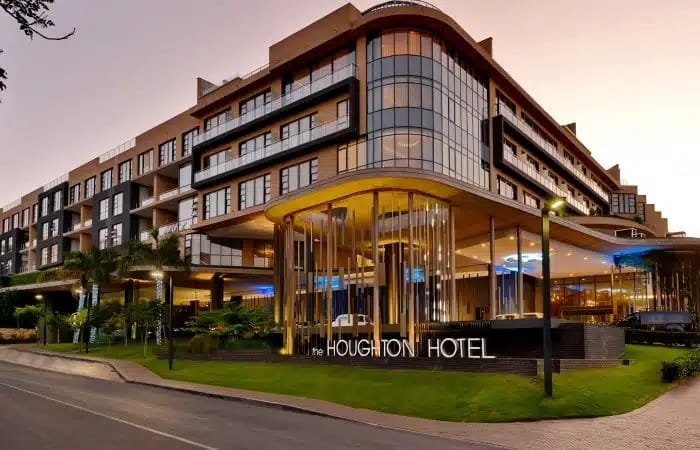

# ***Importing Librarries***

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# **Loading The Data**

In [93]:
h_Data=pd.read_csv('/content/hotel_bookings - hotel_bookings.csv')

# ***Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report***

In [94]:
h_Data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [95]:
h_Data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [96]:
h_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [97]:
h_Data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [98]:
h_Data.shape

(119390, 32)

In [99]:
h_Data.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


# ***📌Small Conclusion***
* The dataset consists of **119,390 entries**.

* The dataset contains **36 columns**, which represent various attributes related to hotel bookings.


### ***Data Types:***

* A majority of the columns, **16 to be precise**, are of the object data type (often representing strings or categorical data).

* **16 columns** are of the int64 data type, representing integer values.

* 4 columns are of the float64 data type, which typically denotes decimal values.

### **Missing Values:**

* The column children has **4** missing values.
* The column country has **488** missing values.
* The column agent has **16,340** missing values.
* The column company has a significant number of missing values, totaling **112,593**.


In [100]:
# Based on the given dataset description, list the columns that are categorical in terms of their semantics
categorical_columns_semantics = [
    'hotel',
    'is_canceled',
    'arrival_date_year',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'is_repeated_guest',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'company',
    'customer_type',
    'reservation_status',
    'name',
    'email',
    'phone-number',
    'credit_card'
]

# Convert these columns to string (object) data type
for column in categorical_columns_semantics:
    if column in h_Data.columns:
        h_Data[column] = h_Data[column].astype(str)

# Verify the changes in data types
h_Data.dtypes

,0
hotel,object
is_canceled,object
lead_time,int64
arrival_date_year,object
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


# ***📌Numerical Variables***

* ***lead_time*** : The average time between booking and arrival is approximately 104 days, ranging from 0 to 737 days.

* ***arrival_date_week_number*** : The average week number of the year for arrival is approximately 27.17, ranging from 1 to 53.

* ***arrival_date_day_of_month*** : The average day of the month of arrival is approximately 15.80, ranging from 1 to 31.

* ***stays_in_weekend_nights*** : On average, guests stay for around 0.93 weekend nights, with some guests staying for as long as 19 weekend nights.

* ***stays_in_week_nights*** : On average, guests stay for about 2.5 week nights, with stays ranging from 0 to 50 week nights.

* ***adults*** : The average number of adults per booking is approximately 1.86, with a range from 0 to 55 adults.

* ***children*** : On average, there are about 0.1 children per booking, with a maximum of 10 children in some bookings.



In [101]:
# Get the summary statistics for categorical variables

h_Data.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
is_canceled,119390,2,0,75166
arrival_date_year,119390,3,2016,56707
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,119390,178,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
is_repeated_guest,119390,2,0,115580
reserved_room_type,119390,10,A,85994


# ***📌Categorical Variables***

* **hotel** : There are two types of hotels, with "City Hotel" being the most frequent category, occurring 79,330 times out of 119,390 entries.

* **is_canceled** : Two unique values (0 for not canceled and 1 for canceled) are present. The most common value is "0" (not canceled), occurring 75,166 times.

* **arrival_date_year** : There are three unique years present, with 2016 being the most frequent year of arrival, observed 56,707 times.

* **arrival_date_month** : There are 12 unique months. August is the most frequent month of arrival, observed 13,877 times.

* ** meal** : Five unique types of meals are booked. The most common type is "BB", observed 92,310 times.

* **country** : 178 unique countries of origin are present. The most frequent country is "PRT" (Portugal), observed 48,590 times.

* **market_segment** : Eight unique market segments are present. The most common segment is "Online TA", observed 56,477 times.

* **distribution_channel** : Five unique booking distribution channels are present, with "TA/TO" being the most frequent, observed 97,870 times.

* **is_repeated_guest** : Two unique values (0 for not repeated and 1 for repeated) are present. The most frequent value is "0" (not repeated), observed in the majority of entries.

* **reserved_room_type and assigned_room_type** : Various room types are present, with some types being more frequent than others.

* **deposit_type** : Three unique types of deposits are made. The most common type is "No Deposit", observed 104,641 times.

* **agent** : There are 334 unique agents, with '9.0' being the most frequent, occurring 31,961 times.

* **company** : There are 353 unique companies, but 'nan' (missing values) is the most frequent, occurring 112,593 times. This indicates that the 'company' variable has a high percentage of missing values.

* **customer_type** : Four unique customer types are present. The most frequent type is "Transient", observed 89,613 times

* **reservation_status** : Three unique reservation statuses are present. The most common status is "Check-Out", observed 75,166 times.

* **reservation_status_date** : There are 926 unique values, with '2015-10-21' being the most frequent, occurring 1,461 times.

* **name** : There are 81,503 unique names, with 'Michael Johnson' being the most frequent, occurring 48 times.

* **email** : There are 115,889 unique email addresses, with 'Michael.C@gmail.com' being the most frequent, occurring 6 times.

* **phone-number** : There are 119,390 unique phone numbers, indicating that almost every guest has a unique phone number.

* **credit_card** : There are 9,000 unique credit card numbers, with '************4923' being the most frequent, occurring 28 times.

# ***Phase 2: Data Cleaning (The Core of the Project)***

# ***Visualize missing values***

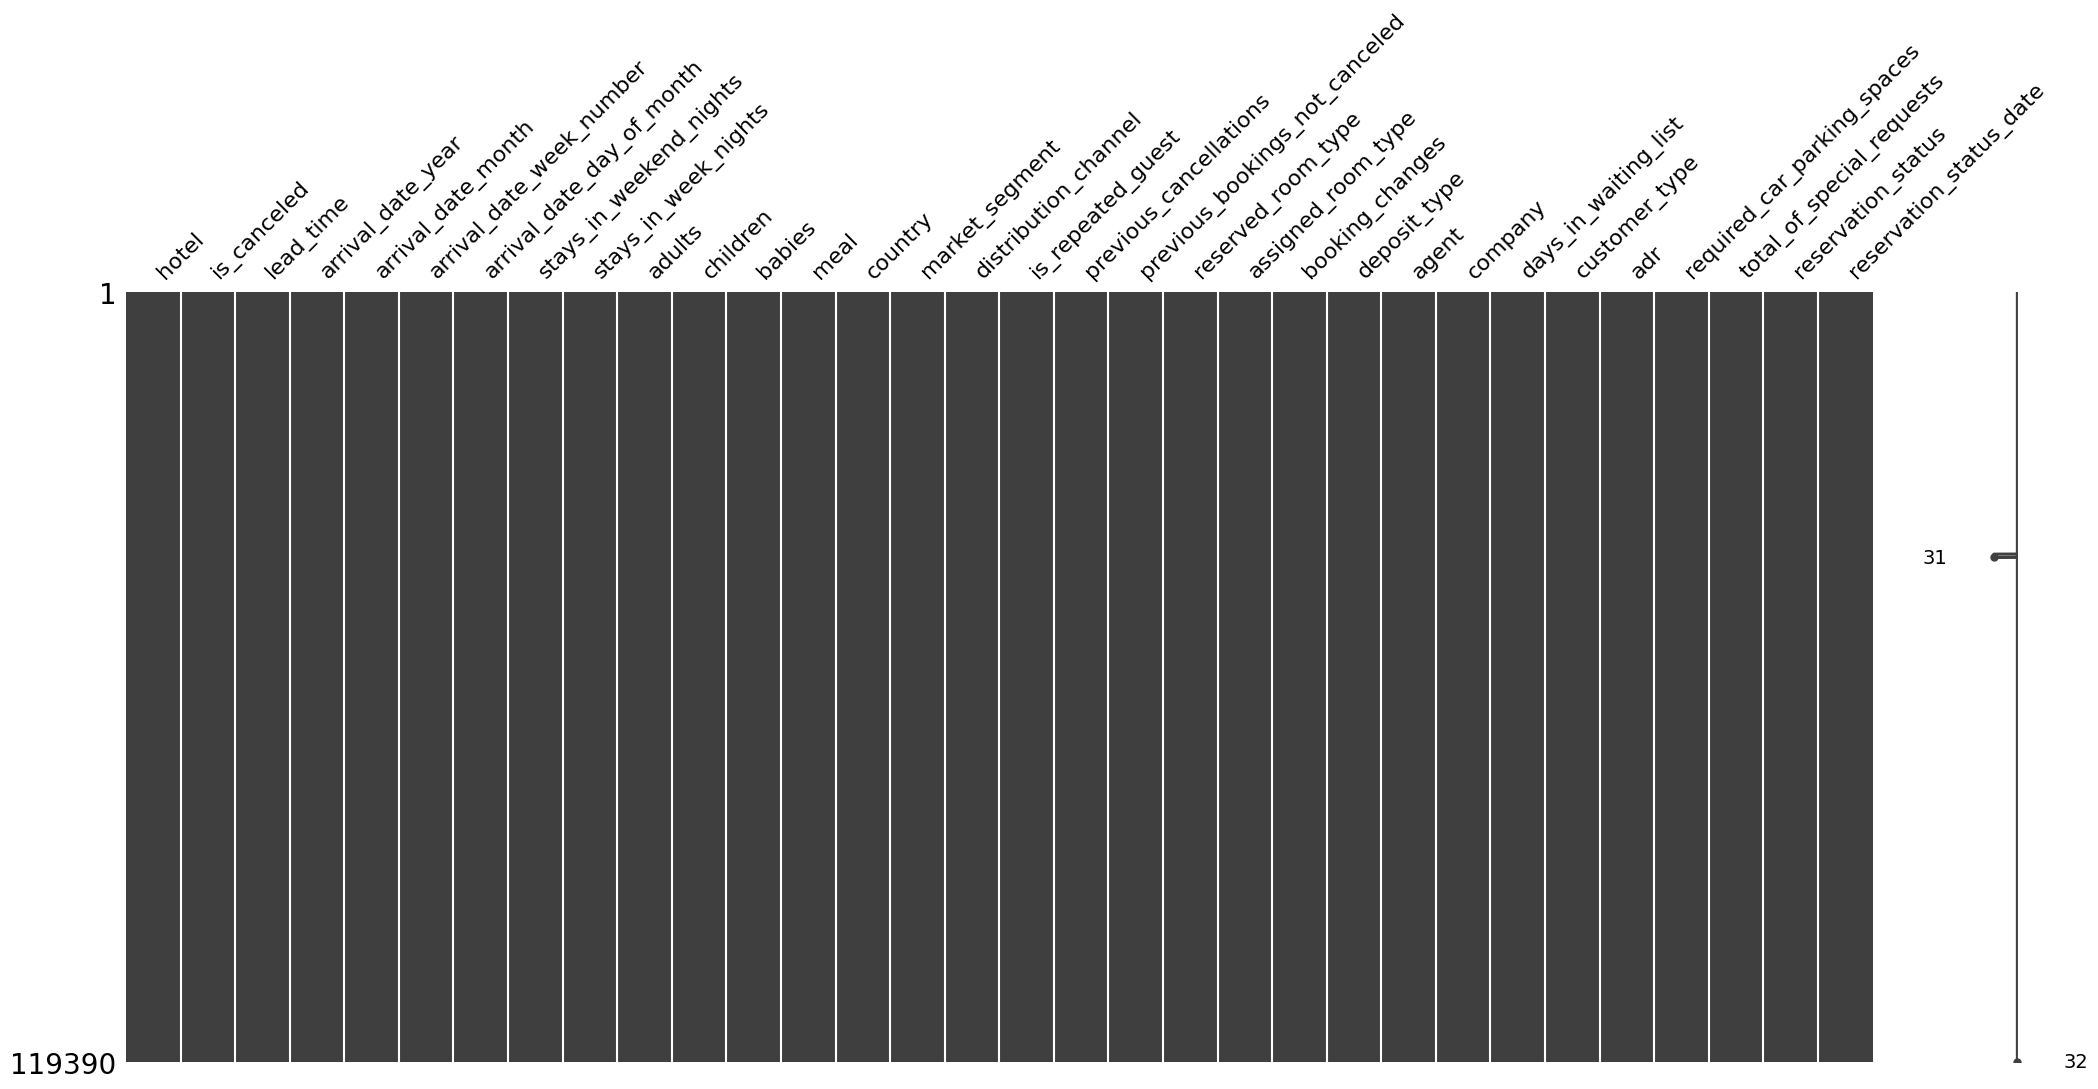

In [102]:
msno.matrix(h_Data)
plt.show()

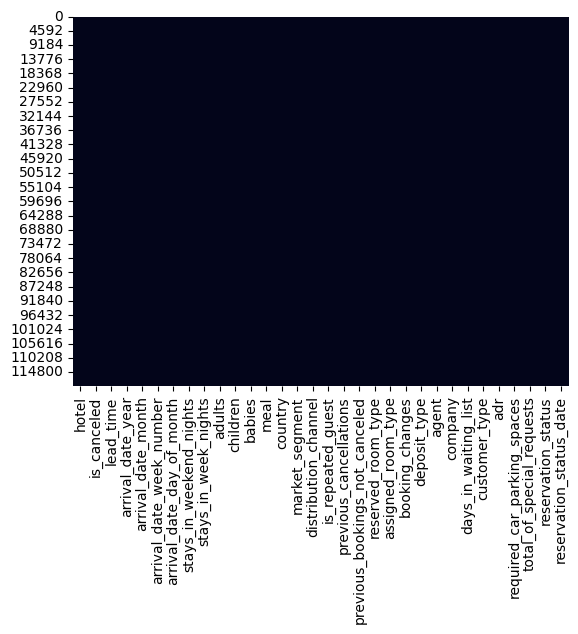

In [103]:
#Heat Map
sns.heatmap(h_Data.isnull(), cbar=False)
plt.show()

In [104]:
h_Data.isnull().mean().mul(100).loc[lambda x: x > 0].sort_values()

,0
children,0.00335


# ***Detect outliers in numeric columns (adr and lead_time)***

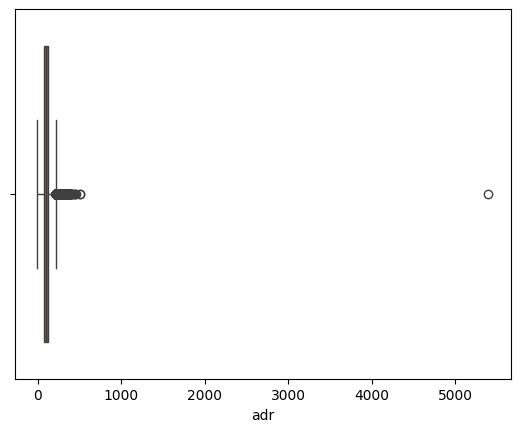

In [105]:
sns.boxplot(x=h_Data['adr'])
plt.show()

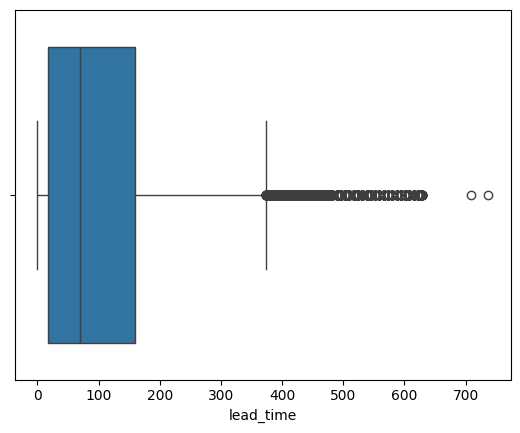

In [106]:
sns.boxplot(x=h_Data['lead_time'])
plt.show()

In [107]:
# IQR method
def detect_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = col[(col < lower_bound) | (col > upper_bound)]
    return outliers


In [108]:
adr_outliers = detect_outliers(h_Data['adr'])
lead_time_outliers = detect_outliers(h_Data['lead_time'])


In [109]:
print(f"ADR outliers: {adr_outliers.shape[0]}")
print(f"Lead time outliers: {lead_time_outliers.shape[0]}")

ADR outliers: 3793
Lead time outliers: 3005


# ***Handling Missing Values***

In [110]:
#So, as you can see that we have a few amount of rows that are missing so, the best choice was to replace it with 0 .
h_Data['children']=h_Data['children'].fillna(0)

In [111]:
#We have also a 488 missing rows so i decided to keep it and just replacing the missing with unkown
h_Data['country']=h_Data['country'].fillna('Unknown')

In [112]:
#We have here 16,340 missing values.
# Indicates no travel agent involved, so filling with 0 is a practical choice.

h_Data['agent'] = h_Data['agent'].fillna(0)

In [113]:
#We have 112,593 missing values (94%).
# Too many missing values, column is not useful → dropped from dataset.
h_Data.drop('company', axis=1, inplace=True)



In [114]:
h_Data.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


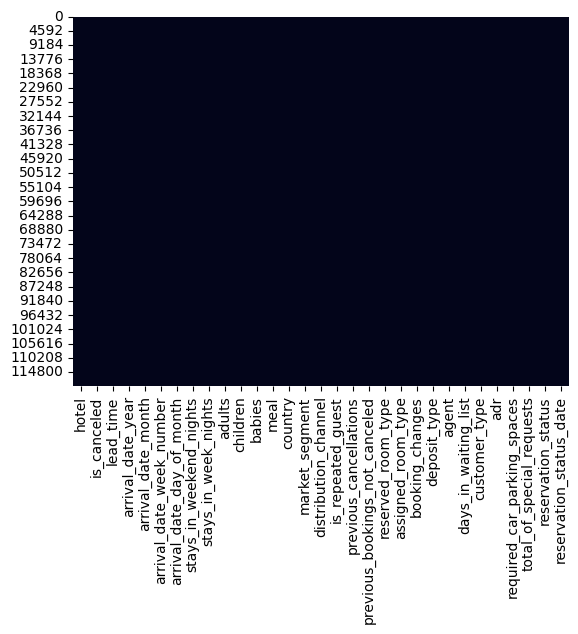

In [115]:
#Heat Map
sns.heatmap(h_Data.isnull(), cbar=False)
plt.show()

***As you can see there are no missing values***

# ***Remove Duplicates***

In [116]:
duplicates = h_Data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 32001


In [117]:
h_Data = h_Data.drop_duplicates()

In [118]:
duplicates = h_Data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


***Duplicates Done***

# ***Handle Outliers***

In [119]:
h_Data['adr'] = h_Data['adr'].apply(lambda x: 1000 if x > 1000 else x)

In [120]:
h_Data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,nan,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,nan,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,nan,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [121]:
h_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87389 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87389 non-null  object 
 1   is_canceled                     87389 non-null  object 
 2   lead_time                       87389 non-null  int64  
 3   arrival_date_year               87389 non-null  object 
 4   arrival_date_month              87389 non-null  object 
 5   arrival_date_week_number        87389 non-null  int64  
 6   arrival_date_day_of_month       87389 non-null  int64  
 7   stays_in_weekend_nights         87389 non-null  int64  
 8   stays_in_week_nights            87389 non-null  int64  
 9   adults                          87389 non-null  int64  
 10  children                        87389 non-null  float64
 11  babies                          87389 non-null  int64  
 12  meal                            8738

In [122]:
h_Data.describe()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87389.000000,87389.000000,87389.000000,87389.000000,87389.000000,87389.000000,87389.000000,87389.000000,87389.000000,87389.000000,87389.000000,87389.000000,87389.000000,87389.000000,87389.000000
mean,79.897195,26.837760,15.815698,1.005321,2.625548,1.875842,0.138644,0.010825,0.030416,0.184005,0.271625,0.749625,106.288720,0.084233,0.698589
std,86.053274,13.674352,8.835244,1.031935,2.053591,0.626490,0.455888,0.113601,0.369160,1.731962,0.727270,10.016130,52.104757,0.281544,0.831950
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,11.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,49.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,125.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,1000.000000,8.000000,5.000000


# ***Phase 3: Feature Engineering & Preprocessing***

***Creating New Features***

In [123]:
h_Data['total_guests'] = h_Data['adults'] + h_Data['children'] + h_Data['babies']
h_Data['total_nights'] = h_Data['stays_in_weekend_nights'] + h_Data['stays_in_week_nights']
h_Data['is_family'] = np.where((h_Data['children'] + h_Data['babies']) > 0, "Yes", "No")


In [124]:
print(h_Data[["adults", "children", "babies", "total_guests", "total_nights", "is_family"]].head())

   adults  children  babies  total_guests  total_nights is_family
0       2       0.0       0           2.0             0        No
1       2       0.0       0           2.0             0        No
2       1       0.0       0           1.0             1        No
3       1       0.0       0           1.0             1        No
4       2       0.0       0           2.0             2        No


In [125]:
print(h_Data['is_family'].value_counts())

is_family
No     78286
Yes     9103
Name: count, dtype: int64


In [126]:
# Drop leakage columns

h_Data.drop(['reservation_status', 'reservation_status_date'], axis=1)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_nights,is_family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,nan,0,Transient,0.00,0,0,2.0,0,No
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,nan,0,Transient,0.00,0,0,2.0,0,No
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,nan,0,Transient,75.00,0,0,1.0,1,No
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.00,0,0,1.0,1,No
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.00,0,1,2.0,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0,Transient,96.14,0,0,2.0,7,No
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0,Transient,225.43,0,2,3.0,7,No
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0,Transient,157.71,0,4,2.0,7,No
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0,Transient,104.40,0,0,2.0,7,No


In [127]:
h_Data['meal']

,meal
0,BB
1,BB
2,BB
3,BB
4,BB
...,...
119385,BB
119386,BB
119387,BB
119388,BB


***Encoding Categorical Variables***

# ***📌No Encoding Needed For these ::***

The following features do not require any encoding as they are either numerical, binary, or ordinal variables that have already been encoded as numbers:

* **is_canceled** : This is the target variable and is binary.
* **lead_time** : This is a numerical variable.
* **arrival_date_week_number** : This is a numerical variable.
* **arrival_date_day_of_month*** : This is a numerical variable.
* **stays_in_weekend_nights** : This is a numerical variable.
* **stays_in_week_nights** : This is a numerical variable.
* **adults**: This is a numerical variable.
* **children** : This is a numerical variable.
* **babies** : This is a numerical variable.
* **is_repeated_guest** : This is a binary variable.
* **previous_cancellations** : This is a numerical variable.
* **previous_bookings_not_canceled** : This is a numerical variable.
* **booking_changes** : This is a numerical variable.
* **days_in_waiting_list** : This is a numerical variable.
* **adr** : This is a numerical variable.
* **required_car_parking_spaces** : This is a numerical variable.
* **total_of_special_requests** : This is a numerical variable.
* **number_of_bookings** : This is a numerical variable.


# ***📌One-Hot Encoding:***
The following features are nominal variables and should be one-hot encoded:

* **hotel** : This is a nominal variable with two categories.
* **meal** : This is a nominal variable.
* **market_segment** : This is a nominal variable.
* **distribution_channel** : This is a nominal variable.
* **reserved_room_type** : This is a nominal variable.
* **deposit_type** : This is a nominal variable.
* **customer_type** : This is a nominal variable.

# ***📌Label Encoding:***
The following feature is an ordinal variable and should be label encoded:

* **arrival_date_month** : This is an ordinal variable (months have a natural order).

In [128]:
# Convert 'arrival_date_month' to numerical values
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
h_Data['arrival_date_month'] = h_Data['arrival_date_month'].apply(lambda x: months.index(x) + 1)

# One-hot encode the specified columns
one_hot_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
pd.get_dummies(h_Data, columns=one_hot_cols, drop_first=True)

h_Data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 87389 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87389 non-null  object 
 1   is_canceled                     87389 non-null  object 
 2   lead_time                       87389 non-null  int64  
 3   arrival_date_year               87389 non-null  object 
 4   arrival_date_month              87389 non-null  int64  
 5   arrival_date_week_number        87389 non-null  int64  
 6   arrival_date_day_of_month       87389 non-null  int64  
 7   stays_in_weekend_nights         87389 non-null  int64  
 8   stays_in_week_nights            87389 non-null  int64  
 9   adults                          87389 non-null  int64  
 10  children                        87389 non-null  float64
 11  babies                          87389 non-null  int64  
 12  meal                            8738

# ***Check Imbalanced Data***

/tmp/ipython-input-3259859115.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])


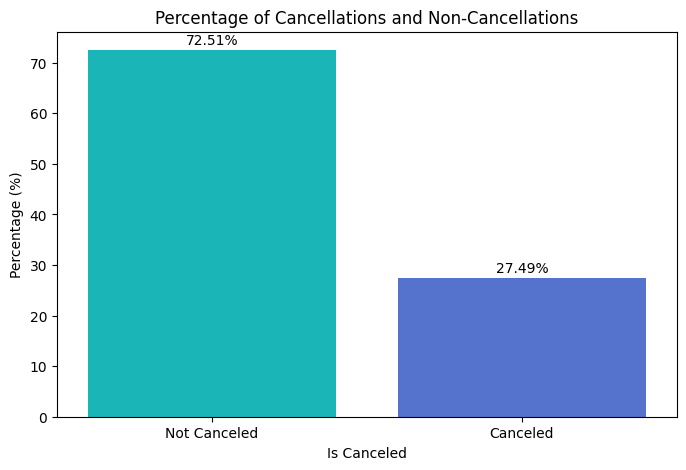

In [129]:
#Calculating the percentage of each class
percentage = h_Data['is_canceled'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])
plt.title('Percentage of Cancellations and Non-Cancellations')
plt.xlabel('Is Canceled')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

In [130]:
le = LabelEncoder()

In [131]:
h_Data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,is_family
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,No
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,No
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,No
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,No
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,No


In [132]:
h_Data['is_family'].value_counts()

,count
is_family,
No,78286
Yes,9103


In [133]:
country_freq = h_Data['country'].value_counts().to_dict()
h_Data['country'].map(country_freq)

print(h_Data[['country']].head(20))


   country
0      PRT
1      PRT
2      GBR
3      GBR
4      GBR
6      PRT
7      PRT
8      PRT
9      PRT
10     PRT
11     PRT
12     USA
13     ESP
14     PRT
15     IRL
16     PRT
17     IRL
18     FRA
19     GBR
20     GBR


In [134]:
X = h_Data.drop('is_canceled', axis=1)


y = h_Data['is_canceled']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y )

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (69911, 33)
Test shape: (17478, 33)


***Train-Test Split***

In [135]:
# Define the features (X) and the output labels (y)
X = h_Data.drop('is_canceled', axis=1)
y = h_Data['is_canceled']

In [136]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)